# Final Project: Predicting upcoming summer clothes' sales on Wish

Azri, Abdullah, Amir

## Dataset

In [1]:
# Importing all the important library for this project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importing the Machine Learning library
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split, cross_val_score

In [2]:
# Read the csv file
sales_Data = pd.read_csv('summer-products-with-rating-and-performance_2020-08.csv')
sales_Data.head()

,title,title_orig,price,retail_price,currency_buyer,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,...,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,merchant_profile_picture,product_url,product_picture,product_id,theme,crawl_month
0,2020 Summer Vintage Flamingo Print Pajamas Se...,2020 Summer Vintage Flamingo Print Pajamas Se...,16.00,14,EUR,100,0,3.76,54,26.0,...,568,4.128521,595097d6a26f6e070cb878d1,0,NaN,https://www.wish.com/c/5e9ae51d43d6a96e303acdb0,https://contestimg.wish.com/api/webimage/5e9ae...,5e9ae51d43d6a96e303acdb0,summer,2020-08
1,SSHOUSE Summer Casual Sleeveless Soirée Party ...,Women's Casual Summer Sleeveless Sexy Mini Dress,8.00,22,EUR,20000,1,3.45,6135,2269.0,...,17752,3.899673,56458aa03a698c35c9050988,0,NaN,https://www.wish.com/c/58940d436a0d3d5da4e95a38,https://contestimg.wish.com/api/webimage/58940...,58940d436a0d3d5da4e95a38,summer,2020-08
2,2020 Nouvelle Arrivée Femmes Printemps et Été ...,2020 New Arrival Women Spring and Summer Beach...,8.00,43,EUR,100,0,3.57,14,5.0,...,295,3.989831,5d464a1ffdf7bc44ee933c65,0,NaN,https://www.wish.com/c/5ea10e2c617580260d55310a,https://contestimg.wish.com/api/webimage/5ea10...,5ea10e2c617580260d55310a,summer,2020-08
3,Hot Summer Cool T-shirt pour les femmes Mode T...,Hot Summer Cool T Shirt for Women Fashion Tops...,8.00,8,EUR,5000,1,4.03,579,295.0,...,23832,4.020435,58cfdefdacb37b556efdff7c,0,NaN,https://www.wish.com/c/5cedf17ad1d44c52c59e4aca,https://contestimg.wish.com/api/webimage/5cedf...,5cedf17ad1d44c52c59e4aca,summer,2020-08
4,Femmes Shorts d'été à lacets taille élastique ...,Women Summer Shorts Lace Up Elastic Waistband ...,2.72,3,EUR,100,1,3.10,20,6.0,...,14482,4.001588,5ab3b592c3911a095ad5dadb,0,NaN,https://www.wish.com/c/5ebf5819ebac372b070b0e70,https://contestimg.wish.com/api/webimage/5ebf5...,5ebf5819ebac372b070b0e70,summer,2020-08


# Data Preparation

### Exploratory Data Analysis


From here, we want to examine the dataset. The shape, type, and so on...

In [3]:
sales_Data.head().T

,0,1,2,3,4
title,2020 Summer Vintage Flamingo Print Pajamas Se...,SSHOUSE Summer Casual Sleeveless Soirée Party ...,2020 Nouvelle Arrivée Femmes Printemps et Été ...,Hot Summer Cool T-shirt pour les femmes Mode T...,Femmes Shorts d'été à lacets taille élastique ...
title_orig,2020 Summer Vintage Flamingo Print Pajamas Se...,Women's Casual Summer Sleeveless Sexy Mini Dress,2020 New Arrival Women Spring and Summer Beach...,Hot Summer Cool T Shirt for Women Fashion Tops...,Women Summer Shorts Lace Up Elastic Waistband ...
price,16.0,8.0,8.0,8.0,2.72
retail_price,14,22,43,8,3
currency_buyer,EUR,EUR,EUR,EUR,EUR
units_sold,100,20000,100,5000,100
uses_ad_boosts,0,1,0,1,1
rating,3.76,3.45,3.57,4.03,3.1
rating_count,54,6135,14,579,20
rating_five_count,26.0,2269.0,5.0,295.0,6.0


In [4]:
# To observe the data information such as data type
sales_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1573 entries, 0 to 1572
Data columns (total 43 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   title                         1573 non-null   object 
 1   title_orig                    1573 non-null   object 
 2   price                         1573 non-null   float64
 3   retail_price                  1573 non-null   int64  
 4   currency_buyer                1573 non-null   object 
 5   units_sold                    1573 non-null   int64  
 6   uses_ad_boosts                1573 non-null   int64  
 7   rating                        1573 non-null   float64
 8   rating_count                  1573 non-null   int64  
 9   rating_five_count             1528 non-null   float64
 10  rating_four_count             1528 non-null   float64
 11  rating_three_count            1528 non-null   float64
 12  rating_two_count              1528 non-null   float64
 13  rat

In [5]:
# To observe the statistical view of the data
sales_Data.describe()

,price,retail_price,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,rating_four_count,rating_three_count,rating_two_count,...,badge_fast_shipping,product_variation_inventory,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,has_urgency_banner,merchant_rating_count,merchant_rating,merchant_has_profile_picture
count,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1528.000000,1528.000000,1528.000000,1528.000000,...,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,1573.000000,473.0,1.573000e+03,1573.000000,1573.000000
mean,8.325372,23.288620,4339.005086,0.432931,3.820896,889.659250,442.263743,179.599476,134.549738,63.711387,...,0.012715,33.081373,2.345200,0.002543,40.456453,49.821360,1.0,2.649583e+04,4.032345,0.143675
std,3.932030,30.357863,9356.539302,0.495639,0.515374,1983.928834,980.203270,400.516231,311.690656,151.343933,...,0.112075,21.353137,1.024371,0.050379,20.301203,2.562799,0.0,7.847446e+04,0.204768,0.350871
min,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,0.000000,6.000000,1.000000,1.0,0.000000e+00,2.333333,0.000000
25%,5.810000,7.000000,100.000000,0.000000,3.550000,24.000000,12.000000,5.000000,4.000000,2.000000,...,0.000000,6.000000,2.000000,0.000000,31.000000,50.000000,1.0,1.987000e+03,3.917353,0.000000
50%,8.000000,10.000000,1000.000000,0.000000,3.850000,150.000000,79.000000,31.500000,24.000000,11.000000,...,0.000000,50.000000,2.000000,0.000000,40.000000,50.000000,1.0,7.936000e+03,4.040650,0.000000
75%,11.000000,26.000000,5000.000000,1.000000,4.110000,855.000000,413.500000,168.250000,129.250000,62.000000,...,0.000000,50.000000,3.000000,0.000000,43.000000,50.000000,1.0,2.456400e+04,4.161797,0.000000
max,49.000000,252.000000,100000.000000,1.000000,5.000000,20744.000000,11548.000000,4152.000000,3658.000000,2003.000000,...,1.000000,50.000000,12.000000,1.000000,140.000000,50.000000,1.0,2.174765e+06,5.000000,1.000000


In [6]:
# To see how much null value in the dataset
sales_Data.isna().sum()

title                              0
title_orig                         0
price                              0
retail_price                       0
currency_buyer                     0
units_sold                         0
uses_ad_boosts                     0
rating                             0
rating_count                       0
rating_five_count                 45
rating_four_count                 45
rating_three_count                45
rating_two_count                  45
rating_one_count                  45
badges_count                       0
badge_local_product                0
badge_product_quality              0
badge_fast_shipping                0
tags                               0
product_color                     41
product_variation_size_id         14
product_variation_inventory        0
shipping_option_name               0
shipping_option_price              0
shipping_is_express                0
countries_shipped_to               0
inventory_total                    0
h

### Drop Unrelated Column

First step is, we dropping all the columns that seems not very usefull for our analyzing and modelling. 
This will help us to reduce the difficulty for visualizing the data.

In [7]:
# dropping the high unique columns from the dataset
max_unique = 60
high_unique = [col for col in sales_Data.select_dtypes(exclude=np.number)
                   if sales_Data[col].nunique() > max_unique]
sales_Data = sales_Data.drop(columns=high_unique)

# show data info
sales_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1573 entries, 0 to 1572
Data columns (total 30 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   price                         1573 non-null   float64
 1   retail_price                  1573 non-null   int64  
 2   currency_buyer                1573 non-null   object 
 3   units_sold                    1573 non-null   int64  
 4   uses_ad_boosts                1573 non-null   int64  
 5   rating                        1573 non-null   float64
 6   rating_count                  1573 non-null   int64  
 7   rating_five_count             1528 non-null   float64
 8   rating_four_count             1528 non-null   float64
 9   rating_three_count            1528 non-null   float64
 10  rating_two_count              1528 non-null   float64
 11  rating_one_count              1528 non-null   float64
 12  badges_count                  1573 non-null   int64  
 13  bad

In [8]:
# visualizing data after dropping some columns
# We use transpose for a clear view data due to large number of column.
sales_Data.head().T

,0,1,2,3,4
price,16.0,8.0,8.0,8.0,2.72
retail_price,14,22,43,8,3
currency_buyer,EUR,EUR,EUR,EUR,EUR
units_sold,100,20000,100,5000,100
uses_ad_boosts,0,1,0,1,1
rating,3.76,3.45,3.57,4.03,3.1
rating_count,54,6135,14,579,20
rating_five_count,26.0,2269.0,5.0,295.0,6.0
rating_four_count,8.0,1027.0,4.0,119.0,4.0
rating_three_count,10.0,1118.0,2.0,87.0,2.0


In [9]:
# total index value of columns ' currency_buyer
sales_Data['currency_buyer'].value_counts()

EUR    1573
Name: currency_buyer, dtype: int64

### Building correlation

In [10]:
# Observe the correlation of the data in table form
corr = sales_Data.corr()
corr

,price,retail_price,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,rating_four_count,rating_three_count,rating_two_count,...,badge_fast_shipping,product_variation_inventory,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,has_urgency_banner,merchant_rating_count,merchant_rating,merchant_has_profile_picture
price,1.000000,0.304748,-0.024815,-0.073269,0.053469,-0.001911,-0.001800,0.000547,-0.012581,-0.010668,...,0.087336,0.274819,0.872580,0.146751,-0.033312,-0.168222,NaN,-0.023790,0.047121,0.017612
retail_price,0.304748,1.000000,0.012638,-0.035325,0.024106,0.053872,0.053113,0.061300,0.048548,0.046051,...,0.032201,0.118842,0.262516,-0.010047,0.035599,-0.003041,NaN,0.029159,0.054399,0.030683
units_sold,-0.024815,0.012638,1.000000,-0.016055,0.039478,0.899464,0.876231,0.891116,0.894243,0.866685,...,-0.000898,0.133846,-0.030987,-0.008308,-0.013553,0.005608,NaN,0.272897,0.122504,0.143529
uses_ad_boosts,-0.073269,-0.035325,-0.016055,1.000000,-0.049410,-0.043936,-0.044368,-0.044739,-0.042531,-0.044983,...,0.038265,-0.135384,-0.061495,-0.018641,-0.017439,0.042395,NaN,0.029735,-0.022564,0.004235
rating,0.053469,0.024106,0.039478,-0.049410,1.000000,0.054112,0.138416,0.100638,0.047221,0.004735,...,-0.013413,0.031954,0.067963,0.024168,0.046423,-0.053156,NaN,0.033837,0.237305,0.012585
rating_count,-0.001911,0.053872,0.899464,-0.043936,0.054112,1.000000,0.983337,0.995923,0.981485,0.946133,...,0.044762,0.134246,-0.005928,-0.001137,-0.001843,0.008076,NaN,0.258168,0.141255,0.155415
rating_five_count,-0.001800,0.053113,0.876231,-0.044368,0.138416,0.983337,1.000000,0.981201,0.932647,0.873690,...,0.037748,0.126482,-0.000858,0.005528,-0.001114,0.000670,NaN,0.248611,0.169999,0.154454
rating_four_count,0.000547,0.061300,0.891116,-0.044739,0.100638,0.995923,0.981201,1.000000,0.976391,0.933168,...,0.038845,0.134769,-0.003915,-0.005099,-0.000657,0.014094,NaN,0.253750,0.149374,0.151164
rating_three_count,-0.012581,0.048548,0.894243,-0.042531,0.047221,0.981485,0.932647,0.976391,1.000000,0.984866,...,0.043169,0.135106,-0.018403,-0.008435,0.001135,0.016963,NaN,0.266071,0.117123,0.139161
rating_two_count,-0.010668,0.046051,0.866685,-0.044983,0.004735,0.946133,0.873690,0.933168,0.984866,1.000000,...,0.052018,0.133624,-0.018417,-0.011331,-0.002154,0.018730,NaN,0.261776,0.097294,0.135635


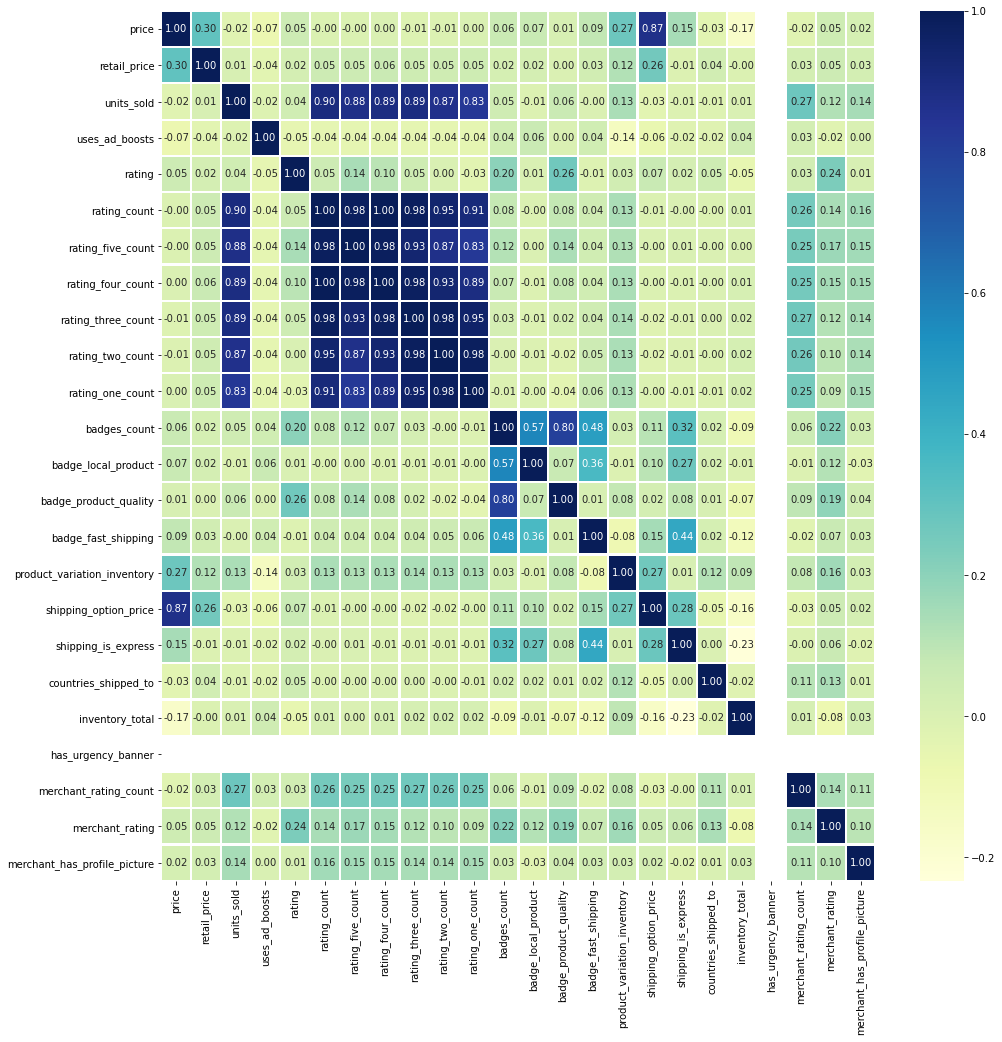

In [11]:
# create heatmap graph for a better visualization of the data correlation
fig,ax = plt.subplots(figsize = (16,16))
ax = sns.heatmap(corr,
                 annot=True,
                 linewidths=1.2,
                 fmt=".2f",
                 cmap="YlGnBu");

### Visualizing some columns

For better understanding of the dataset, we would visualizing related columns

In [12]:
sales_Data.groupby('origin_country').origin_country.count()

origin_country
AT       1
CN    1516
GB       1
SG       2
US      31
VE       5
Name: origin_country, dtype: int64

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


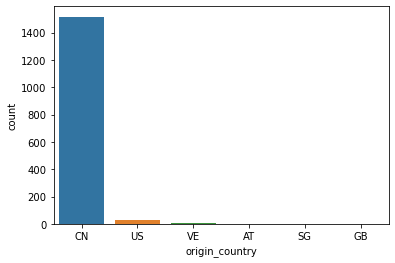

In [13]:
sns.countplot(sales_Data['origin_country']);

From this graph we can observe that CN has the biggest(too big) data count of the origin country compare to Us,VE,AT,SG, and GB

In [14]:
sales_Data.groupby('urgency_text').urgency_text.count()

urgency_text
Quantité limitée !                  472
Réduction sur les achats en gros      1
Name: urgency_text, dtype: int64

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


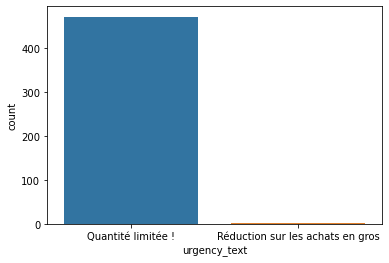

In [15]:
sns.countplot(sales_Data['urgency_text']);

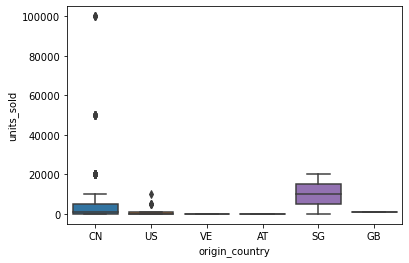

In [16]:
sns.boxplot(x = sales_Data.origin_country,y = sales_Data.units_sold);

From the box plot above, it's hard to visualize and analise the data. Hence, we use bar plot as below.

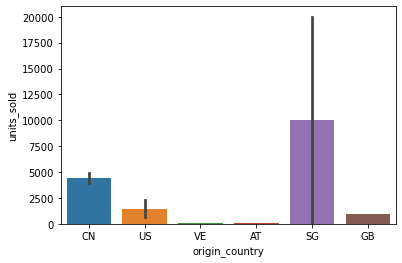

In [17]:
sns.barplot(x = sales_Data.origin_country,y = sales_Data.units_sold);

From this barplot, we can observe that SG has the highest unit sold compare to other countries, while VE and AT are both silarly lowest unit sold

In [18]:
# Count the total index of the 'has_urgency_banner' column
sales_Data['has_urgency_banner'].value_counts()

1.0    473
Name: has_urgency_banner, dtype: int64

Dropping some more columns

From the visualization above, there are still columns that need to be dropped that has no helpfull in predicting the upcoming sales

In [19]:
sales_Data = sales_Data.drop(['crawl_month','origin_country','rating_count','shipping_option_name','urgency_text'],axis = 1)

In [20]:
sales_Data.head().T

,0,1,2,3,4
price,16.0,8.0,8.0,8.0,2.72
retail_price,14,22,43,8,3
currency_buyer,EUR,EUR,EUR,EUR,EUR
units_sold,100,20000,100,5000,100
uses_ad_boosts,0,1,0,1,1
rating,3.76,3.45,3.57,4.03,3.1
rating_five_count,26.0,2269.0,5.0,295.0,6.0
rating_four_count,8.0,1027.0,4.0,119.0,4.0
rating_three_count,10.0,1118.0,2.0,87.0,2.0
rating_two_count,1.0,644.0,0.0,42.0,2.0


In [21]:
sales_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1573 entries, 0 to 1572
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   price                         1573 non-null   float64
 1   retail_price                  1573 non-null   int64  
 2   currency_buyer                1573 non-null   object 
 3   units_sold                    1573 non-null   int64  
 4   uses_ad_boosts                1573 non-null   int64  
 5   rating                        1573 non-null   float64
 6   rating_five_count             1528 non-null   float64
 7   rating_four_count             1528 non-null   float64
 8   rating_three_count            1528 non-null   float64
 9   rating_two_count              1528 non-null   float64
 10  rating_one_count              1528 non-null   float64
 11  badges_count                  1573 non-null   int64  
 12  badge_local_product           1573 non-null   int64  
 13  bad

### LabelEncoding 'currency_buyer'& 'theme' columns and checking the missing value

we use lebelencoder to encoding the levels of categorical features into numeric values.

In [22]:
# use the labelencoder to the 'currency_buyer' & 'theme' columns
le_Data = LabelEncoder()
sales_Data['currency_buyer'] = le_Data.fit_transform(sales_Data['currency_buyer'])
sales_Data['theme'] = le_Data.fit_transform(sales_Data['theme'])

Checking all the columns with Missing values

In [23]:
for label,content in sales_Data.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isna(content).sum():
            print(label)

rating_five_count
rating_four_count
rating_three_count
rating_two_count
rating_one_count
has_urgency_banner


In [24]:
sales_Data['has_urgency_banner'].value_counts()

1.0    473
Name: has_urgency_banner, dtype: int64

filling 'has_urgency_banner' column with 0

In [25]:
sales_Data['has_urgency_banner'] = sales_Data['has_urgency_banner'].fillna(0)

filling all the other columns with meadian

In [26]:
for label,content in sales_Data.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isna(content).sum():
            sales_Data[label] = content.fillna(content.median())

In [27]:
sales_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1573 entries, 0 to 1572
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   price                         1573 non-null   float64
 1   retail_price                  1573 non-null   int64  
 2   currency_buyer                1573 non-null   int32  
 3   units_sold                    1573 non-null   int64  
 4   uses_ad_boosts                1573 non-null   int64  
 5   rating                        1573 non-null   float64
 6   rating_five_count             1573 non-null   float64
 7   rating_four_count             1573 non-null   float64
 8   rating_three_count            1573 non-null   float64
 9   rating_two_count              1573 non-null   float64
 10  rating_one_count              1573 non-null   float64
 11  badges_count                  1573 non-null   int64  
 12  badge_local_product           1573 non-null   int64  
 13  bad

In [28]:
sales_Data.head()

,price,retail_price,currency_buyer,units_sold,uses_ad_boosts,rating,rating_five_count,rating_four_count,rating_three_count,rating_two_count,...,product_variation_inventory,shipping_option_price,shipping_is_express,countries_shipped_to,inventory_total,has_urgency_banner,merchant_rating_count,merchant_rating,merchant_has_profile_picture,theme
0,16.00,14,0,100,0,3.76,26.0,8.0,10.0,1.0,...,50,4,0,34,50,1.0,568,4.128521,0,0
1,8.00,22,0,20000,1,3.45,2269.0,1027.0,1118.0,644.0,...,50,2,0,41,50,1.0,17752,3.899673,0,0
2,8.00,43,0,100,0,3.57,5.0,4.0,2.0,0.0,...,1,3,0,36,50,1.0,295,3.989831,0,0
3,8.00,8,0,5000,1,4.03,295.0,119.0,87.0,42.0,...,50,2,0,41,50,0.0,23832,4.020435,0,0
4,2.72,3,0,100,1,3.10,6.0,4.0,2.0,2.0,...,1,1,0,35,50,1.0,14482,4.001588,0,0


In [29]:
# Recheck for more null values
sales_Data.isna().sum()

price                           0
retail_price                    0
currency_buyer                  0
units_sold                      0
uses_ad_boosts                  0
rating                          0
rating_five_count               0
rating_four_count               0
rating_three_count              0
rating_two_count                0
rating_one_count                0
badges_count                    0
badge_local_product             0
badge_product_quality           0
badge_fast_shipping             0
product_variation_inventory     0
shipping_option_price           0
shipping_is_express             0
countries_shipped_to            0
inventory_total                 0
has_urgency_banner              0
merchant_rating_count           0
merchant_rating                 0
merchant_has_profile_picture    0
theme                           0
dtype: int64

### Splitting the data into Training and Testing sets

continue with our modelling by 3 steps.
1. Split data into categories
1. Train the model
1. Test the model

In [41]:
x = sales_Data.drop('units_sold',axis = 1)
y = sales_Data['units_sold']
z = sales_Data['price']

In [31]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.2)

We split data by train 80% of the data and test the other 20%.

## Building the models

We build 2 type of models which is Random Forest and Linear Regression. Hence, find the best accuracy model. 

### RandomForest

Advantages 
- minimal data preparation 
- it can have high accuracy 

Disadvantages 
- Large dataset are requirement 
- slow to train are possible

In [32]:
# Building the Random Forest Model
model = RandomForestRegressor(n_estimators = 1000,random_state = 42)
# Train the model
model.fit(x_train,y_train)

RandomForestRegressor(n_estimators=1000, random_state=42)

In [33]:
# Test the accuracy of the model
model.score(x_test,y_test)

0.8589791530937096

### LinearRegression

Advantages of linear regression:

- Simple to explain.
- Highly interpretable.
- Model training and prediction are fast.

Disadvantages of linear regression:

- Presumes a linear relationship between the features and the response.
- Performance is (generally) not competitive with the best supervised learning methods due to high bias.
- Can't automatically learn feature interactions.

In [34]:
#Building the Linear Regression Model
model1 = LinearRegression()
# Train the model
model1.fit(x_train,y_train)

LinearRegression()

In [35]:
print(model1.intercept_)
print(model1.coef_)

1543.217885836485
[ 3.04137426e+01 -2.72083295e+00  1.53389301e-10  4.44318609e+02
 -4.17292598e+01  3.14089791e+00 -3.47677899e+00  2.38040257e+01
 -1.46912890e+01  6.87411786e+00 -1.08406967e+03  1.57839579e+03
  1.22056179e+03 -3.88302725e+03  5.38791221e+00 -3.18606422e+02
  4.48598228e+03 -1.15323040e+01 -4.25431069e+01 -4.86041199e+02
  3.39302886e-03  5.23981513e+02  5.36289594e+02  0.00000000e+00]


In [50]:
# Test the accuracy of the model
model1.score(x_test,y_test)

0.8722246782185387

- If one unit increase in unit sold is associated with price increase on 3.04 EUR.
- If one unit increase in unit sold is associated with retail price decrease on 2.72 EUR.

### Plotting the scores of both the model

In [48]:
scores = pd.DataFrame({'RandomForest': model.score(x_test,y_test),
                       'LinearRegression': model1.score(x_test,y_test)},
                        index = [0])

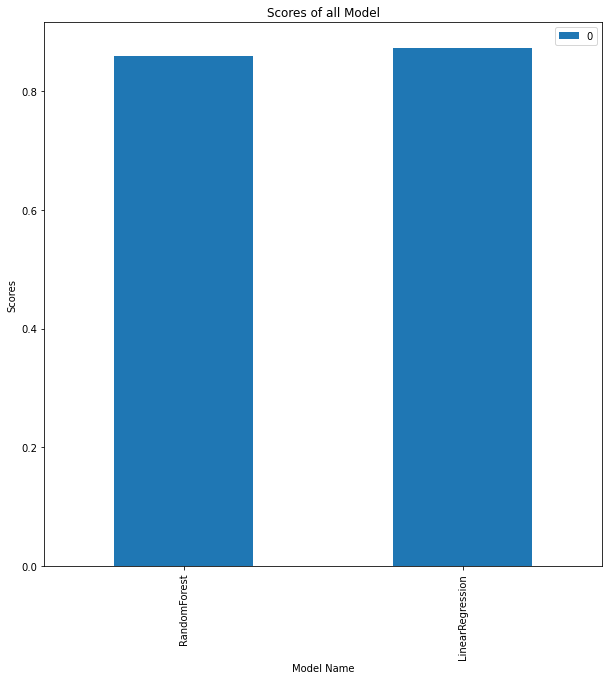

In [49]:
scores.T.plot(kind = 'bar',
              figsize = (10,10))
plt.title('Scores of all Model')
plt.xlabel('Model Name')
plt.ylabel('Scores');

In conclusion, Random Forest accuracy is closed to Linear Resgression with data 0.86 and 0.87 respectively.